<a href="https://colab.research.google.com/github/Debayan2004/BR_Segmentation/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d debayan20000/brainsegmentation2018-dataset

Dataset URL: https://www.kaggle.com/datasets/debayan20000/brainsegmentation2018-dataset
License(s): apache-2.0
100% 1.94G/1.95G [00:16<00:00, 60.4MB/s]
100% 1.95G/1.95G [00:16<00:00, 124MB/s] 


In [2]:
import zipfile
import os

# Path to your .zip file
zip_file_path = '/content/brainsegmentation2018-dataset.zip'

# Directory where you want to extract the files
extract_to_path = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("File unzipped successfully!")


File unzipped successfully!


In [27]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

In [28]:
# Function to load and visualize MRI slices
def load_nifti_image(filepath):
    """
    Load a NIfTI file using nibabel.
    Args:
        filepath: Path to the .nii file
    Returns:
        A 3D numpy array representing the image.
    """
    nii_img = nib.load(filepath)
    return nii_img.get_fdata()

In [29]:
def visualize_slices(mri_images, seg_mask, slice_idx):
    """
    Visualizes slices of the MRI images and segmentation mask.
    Args:
        mri_images: List of 3D arrays, where each array corresponds to a different MRI sequence (T1, T1-IR, T2-FLAIR).
        seg_mask: 3D array representing the segmentation mask.
        slice_idx: The index of the slice to visualize.
    """
    # Print shapes for debugging
    for i, img in enumerate(mri_images):
        print(f"Shape of MRI modality {i}: {img.shape}")
    print(f"Shape of Segmentation Mask: {seg_mask.shape}")

    # Ensure the slice index is valid
    num_slices = mri_images[0].shape[2]  # Assume all modalities have the same depth
    if slice_idx >= num_slices:
        print(f"Slice index {slice_idx} is out of bounds. Adjusting to {num_slices - 1}.")
        slice_idx = num_slices - 1  # Use the last valid slice

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Titles for the modalities
    titles = ['T1', 'T1-IR', 'T2-FLAIR', 'Segmentation Mask']

    # Plot the MRI sequences (T1, T1-IR, T2-FLAIR)
    for i, img in enumerate(mri_images):
        axs[i].imshow(img[:, :, slice_idx], cmap='gray')
        axs[i].set_title(titles[i])
        axs[i].axis('off')

    # Plot the segmentation mask
    axs[3].imshow(seg_mask[:, :, slice_idx], cmap='jet')
    axs[3].set_title('Segmentation Mask')
    axs[3].axis('off')

    plt.show()

In [55]:
# Paths to the MRI modalities and segmentation masks
# Replace with the actual paths to your files
t1_path = '/content/training_dataset/29/pre/T1.nii/T1.nii'
t1_ir_path = '/content/training_dataset/29/pre/IR.nii/IR.nii'
t2_flair_path = '/content/training_dataset/29/pre/FLAIR.nii/FLAIR.nii'
seg_path = '/content/training_dataset/29/segm.nii/segm.nii'

In [56]:
# Load the images
t1_img = load_nifti_image(t1_path)
t1_ir_img = load_nifti_image(t1_ir_path)
t2_flair_img = load_nifti_image(t2_flair_path)
seg_img = load_nifti_image(seg_path)

In [65]:
# Resample function to match dimensions
def resample_image(img, target_shape):
    """
    Resamples the 3D image to match the target shape.
    Args:
        img: 3D numpy array representing the image.
        target_shape: Tuple representing the desired shape.
    Returns:
        Resampled 3D image.
    """
    factors = [t / s for t, s in zip(target_shape, img.shape)]
    resampled_img = zoom(img, factors, order=1)  # Use linear interpolation
    return resampled_img

In [66]:
# Define the target shape
target_shape = (256, 256, 64)

In [71]:
# Resample the T1 modality to match the target shape
t1_img_resized = resample_image(t1_img, target_shape)
t1_IR_img_resized = resample_image(t1_ir_img, target_shape)
t2_Flair_resized = resample_image(t2_flair_img, target_shape)
seg_resized = resample_image(seg_img, target_shape)


In [73]:
# Check the shape of the resized image
print(f"Resized T1 shape: {t1_img_resized.shape}")
print(f"Resized T1_IR shape: {t1_IR_img_resized.shape}")
print(f"Resized T2_flair shape: {t2_Flair_resized.shape}")
print(f"Resized Segmentation shape: {seg_resized.shape}")

Resized T1 shape: (256, 256, 64)
Resized T1_IR shape: (256, 256, 64)
Resized T2_flair shape: (256, 256, 64)
Resized Segmentation shape: (256, 256, 64)


In [76]:
# Specify a slice index (for example, 60)
slice_idx = 50


Shape of MRI modality 0: (256, 256, 64)
Shape of MRI modality 1: (256, 256, 64)
Shape of MRI modality 2: (256, 256, 64)
Shape of Segmentation Mask: (256, 256, 64)


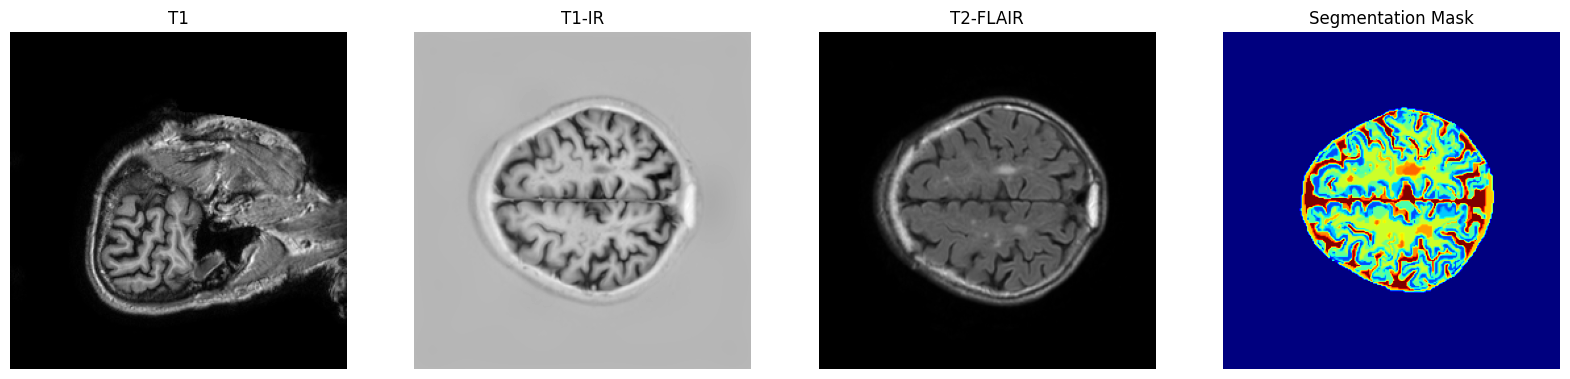

In [77]:
# Visualize the slices
visualize_slices([t1_img_resized, t1_IR_img_resized, t2_Flair_resized], seg_resized, slice_idx)